In [23]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
import os
from shapely.geometry import Point
import ast  

path = "/Users/claireconzelmann/Documents/GitHub/KIHC-affordable-housing-analysis"

In [54]:
tif_districts = pd.read_csv(os.path.join(path, "Data/Raw/Boundaries_Tax_Increment_Financing_Districts.csv"))
city_land = pd.read_csv(os.path.join(path, "Data/Raw/City-Owned_Land_Inventory_20250320.csv"))
l_stops = pd.read_csv(os.path.join(path, "Data/Raw/CTA_System_Information_List_of_L_Stops.csv"))
bus_stops_gdf = gpd.read_file(os.path.join(path, "Data/Raw/CTA_BusStops.shp"))
metra_stops_gdf = gpd.read_file(os.path.join(path, "Data/Raw/MetraStations.shp"))

In [55]:
#create geopandas objects
tif_districts["the_geom"] = tif_districts["the_geom"].apply(wkt.loads)
tif_districts_gdf = gpd.GeoDataFrame(tif_districts, geometry="the_geom")
tif_districts_gdf = tif_districts_gdf.set_crs(epsg=4326, inplace=True)

city_land_gpd = gpd.GeoDataFrame(city_land, 
                                 geometry=gpd.points_from_xy(city_land.Longitude, 
                                                             city_land.Latitude), 
                                 crs="EPSG:4326")

# Convert string representation of tuples of long/lat in lstop data into actual tuples
l_stops["Location"] = l_stops["Location"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

l_stops["geometry"] = l_stops["Location"].apply(lambda x: Point(x[1], x[0]))
l_stops_gdf = gpd.GeoDataFrame(l_stops, geometry="geometry")
l_stops_gdf.set_crs(epsg=4326, inplace=True)

bus_stops_gdf.set_crs(epsg=4326, inplace=True)
metra_stops_gdf.to_crs(epsg=4326, inplace=True)


In [59]:
#filtering metra stops to chicago only
metra_stops_gdf = metra_stops_gdf.loc[metra_stops_gdf["MUNICIPALI"]=="Chicago"]

#create 1/2 mile buffers around CTA and Metra stops (ETOD eligible)
metra_stops_gdf = metra_stops_gdf.to_crs(epsg=3857)
metra_stops_gdf["buffer_half_mile"] = metra_stops_gdf.geometry.buffer(804.67)
metra_stops_gdf = metra_stops_gdf.to_crs(epsg=4326)

l_stops_gdf = l_stops_gdf.to_crs(epsg=3857)
l_stops_gdf["buffer_half_mile"] = l_stops_gdf.geometry.buffer(804.67)
l_stops_gdf = l_stops_gdf.to_crs(epsg=4326)

In [64]:
metra_stops_gdf.head()

,OBJECTID,STATION_ID,ASSET_ID,NAME,LONGNAME,LINES,BRANCH_ID,STATUS,MILEPOST,FAREZONE,...,ADDRESS,MUNICIPALI,TELEPHONE,WEBLINK,LABELANGLE,EDIT_INIT,EDIT_DATE,YEAR_OPEN,geometry,buffer_half_mile
0,1,1091.0,51201091.0,Stony Island,Stony Island,Electric,1,1,9.1,B,...,71st St. (at Stony Island Ave.),Chicago,None,None,30,ks,1995-08-02,None,MULTIPOINT (-87.58685 41.76601),"POLYGON ((-9749318.914 5125993.14, -9749322.78..."
1,2,1097.0,51201097.0,Bryn Mawr,Bryn Mawr,Electric,1,1,9.7,B,...,71st St. (at Jeffrey Blvd.),Chicago,None,None,30,ks,1995-08-02,None,MULTIPOINT (-87.577 41.76612),"POLYGON ((-9748222.006 5126008.76, -9748225.88..."
2,3,1103.0,51201103.0,South Shore,South Shore,Electric,1,1,10.3,B,...,71st St. (near Yates and South Shore Dr.),Chicago,None,None,0,ks,1995-08-02,None,MULTIPOINT (-87.56571 41.76524),"POLYGON ((-9746966.048 5125878.569, -9746969.9..."
3,4,1109.0,51201109.0,Windsor Park,Windsor Park,Electric,1,1,10.9,B,...,75th St. (at Exchange Ave.),Chicago,None,None,0,ks,1995-08-02,None,MULTIPOINT (-87.55963 41.75851),"POLYGON ((-9746288.63 5124873.496, -9746292.50..."
4,5,1115.0,51201115.0,Cheltenham,Cheltenham (79th Street),Electric,1,1,11.5,B,...,79th St. (at Exchange Ave.),Chicago,None,None,0,ks,1995-08-02,None,MULTIPOINT (-87.55285 41.75232),"POLYGON ((-9745534.201 5123950.163, -9745538.0..."


<Axes: >

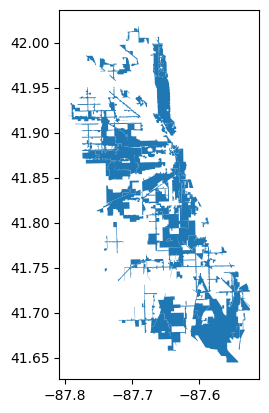

In [8]:
tif_districts_gdf.plot()

<Axes: >

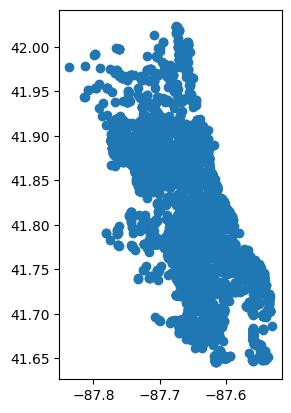

In [7]:
city_land_gpd.plot()

<Axes: >

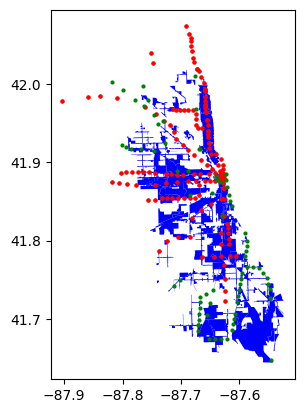

In [58]:
fig, ax = plt.subplots()

# Plot the first GeoDataFrame
tif_districts_gdf.plot(ax=ax, color='blue')

# Plot the second GeoDataFrame on the same axes
l_stops_gdf.plot(ax=ax, color='red', markersize=4)

metra_stops_gdf.plot(ax=ax, color='green', markersize=4)

<Axes: >

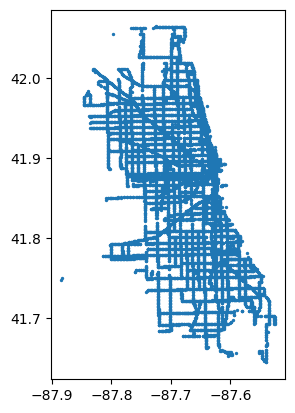

In [43]:
bus_stops_gdf.plot(markersize=2)

<Axes: >

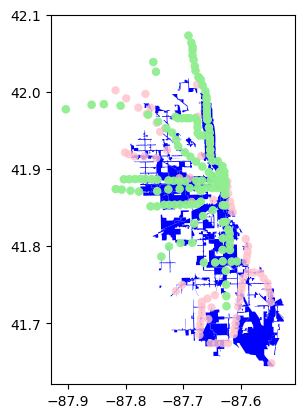

In [67]:
fig, ax = plt.subplots()
tif_districts_gdf.plot(ax=ax, color='blue')
metra_stops_gdf.set_geometry("buffer_half_mile").to_crs(epsg=4326).plot(ax=ax, color="pink", alpha=0.8, label="Half-Mile Buffer")
l_stops_gdf.set_geometry("buffer_half_mile").to_crs(epsg=4326).plot(ax=ax, color="lightgreen", alpha=0.8, label="Half-Mile Buffer")